# Physical Modeling Synthesis 
## George Tzanetakis 


Most approaches to sound synthesis (additive, subtractive, sampling, wavetable, FM) are based on modeling sound. In contrast, physical modeling approaches attempt to model the actual physics of sound production. For example although we can get very realistic sounds with sampling, in order to capture different dynamics and expression we would need to record a very large number of samples and have sophisticated ways of switching between them based on the player actions. 

In [138]:
import numpy as np
import IPython.display as ipd

#plot_library = 'matplotlib'
#plot_library = 'matplotlib_xkcd'
plot_library = 'bokeh'


if (plot_library=='bokeh'):
    import bokeh 
    from bokeh.io import output_notebook
    from bokeh.plotting import figure, output_file, show
    output_notebook()

    def plot(data_list): 
        p = figure(plot_height=300, plot_width=600, title='Synthesizers')
        for data in data_list: 
            p.line(np.arange(0,len(data)), data)
        show(p)
        
if (plot_library=='matplotlib'): 
    %matplotlib notebook 
    import matplotlib.pyplot as plt
    def plot(data_list,label_list=[],xlabel='', ylabel='', title=''):
        fig, ax = plt.subplots(figsize=(4,2))
        for (data,label) in zip(data_list, label_list): 
            plt.title('Synth-CS: '+title)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.plot(np.arange(0, len(data)), data, label=label)
        if (label_list):
            ax.legend()
        
        
if (plot_library=='matplotlib_xkcd'): 
    %matplotlib notebook 
    import matplotlib.pyplot as plt

    def plot(data_list,label_list=[],xlabel='', ylabel='', title=''):
        fig, ax = plt.subplots(figsize=(4,2))  
        plt.xkcd()
        if not(label_list):
            for d in enumerate(data_list): 
                label_list.append('')
        for (data,label) in zip(data_list, label_list): 
            plt.title('Synth-CS: '+title)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.plot(np.arange(0, len(data)), data, label=label)  
            ax.legend()
    

Loading BokehJS ...

In [159]:
srate = 16000
freq = 50 


def karplus_strong(freq, n_samples):
    wavetable_size = srate // int(freq)
    wavetable = (2 * np.random.randint(0, 2, wavetable_size) - 1).astype(float)
    plot([wavetable])
    
    samples = []
    current_sample = 0
    previous_value = 0
    while len(samples) < n_samples:
        # wavetable[current_sample] = 0.5 * (wavetable[current_sample] + previous_value)
        samples.append(wavetable[current_sample])
        previous_value = samples[-1]
        current_sample += 1
        current_sample = current_sample % wavetable.size
    return np.array(samples)


note = karplus_strong(freq, 5 * srate)

In [160]:
ipd.Audio(wavetable, rate=srate)

In [161]:
plot([note[8000:12000]])
ipd.Audio(note, rate=srate)

In [152]:
def karplus_strong_drum(freq, n_samples, prob):
    wavetable_size = srate // freq 
    wavetable = np.ones(wavetable_size)
    plot([wavetable])
    samples = []
    current_sample = 0
    previous_value = 0
    while len(samples) < n_samples:
        r = np.random.binomial(1, prob)
        sign = float(r == 1) * 2 - 1
        wavetable[current_sample] = sign * 0.5 * (wavetable[current_sample] + previous_value)
        samples.append(wavetable[current_sample])
        previous_value = samples[-1]
        current_sample += 1
        current_sample = current_sample % wavetable.size
    return np.array(samples)


In [158]:
freq = 40 
srate = 8000

drum_note = karplus_strong_drum(freq, 2 * srate, 0.98)
ipd.Audio(drum_note, rate=srate)

Karpuls and Strong discovered that by using this simple averaging process one could obtain harmonically rich, decaying sound that sounded like strings and drums. Such sounds would require many oscillators to approximate with additive synthesis. 


Julius Smith made the connection between the physics of string vibration 
and explained why the Karplus-Strong algorithm worked so well. 

There is a simple differential equation that describes the motion of an ideal string: 

$$ 
\frac{d^2 y}{dx^2} = \left(\frac{1}{c^2}\right) \frac{d^2 y}{dt^2}
$$

y is up and down 
x is the string position 
and c is the speed of wave motion which depends on the string tension and mass 

Maybe incude derivation. 

There is a solution to this equation that basically says that any vibration of the string can be expressed as a combination of two separate traveling waves, one moving in the left direction ($y_{L}$) and one going in the right direction ($y_{R}$). 

$$ y(x,t) = y_{L} \left(t+ \frac{x}{c} \right) + y_{R}\left(t+\frac{x}{c}\right)$$

<IPython.core.display.Javascript object>


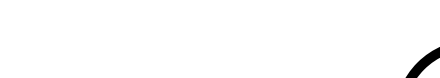

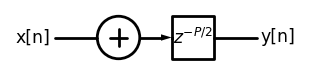

In [137]:
import schemdraw
import schemdraw
import schemdraw.dsp as dsp

with schemdraw.Drawing() as d:
    d.config(unit=1, fontsize=14)
    d += dsp.Line().length(d.unit).label('x[n]', 'left')
    d += (s0 := dsp.Sum().anchor('W'))
    d += dsp.Arrow().right(d.unit*.75)
    d += dsp.Square().label('$z^{-P/2}$')
    d.push()
    d += dsp.Line().length(d.unit).label('y[n]', 'right')


    d.push()
    
    #d += dsp.Line().right()
    #d += dsp.Amp().label('$b_0$', 'bottom')

    #d += dsp.Arrow()
    #d += (s0 := dsp.Sum().anchor('W'))
    #d += dsp.Arrow().right().label('y[n]', 'right').hold()
    #
    #d.pop()
    
    #d += dsp.Arrow().down(d.unit*.75)
    #d += dsp.Line().down(d.unit*.75)
    #d += dsp.Line().right()
    #d += dsp.Amp().label('$b_1$', 'bottom')
    #d.push()
    
    #d += dsp.Line().length(d.unit*1.5).right()
    #d += dsp.Line().up(length=d.unit*2.0)
    #d.pop()



1. Delay Line 
Linear interpolation and all pass implementation
   
2. OneZero Loop filter 
3. OnePole Pick filter 
4. Ring/Circular Buffer 









Delay lines are fundamental building blocks in audio and music processing. 

Digital audio effects
– Phasing
– Flanging
– Chorus
– Leslie
– Reverb
• Physical modeling synthesis
– Acoustic propagation delay (echo, multipath)
– Vibrating strings (guitars, violins, . . . )
– Woodwind bores
– Horns
– Percussion (rods, membranes)

A delay line is a system that delays it's input by a specified number of samples. If the delay is an integer multiple of samples, a digital delay line can be implemented as a circular buffer. 

$$
y(n) = x(n-M) 
$$

typically $x(-1), x(-2), x(-M)$ is set to zero. 





In [162]:


class DelayLineInt:
    def __init__(self):
        self.M = 10 
        self.circular_buffer = np.zeros(M)
        self.read_ptr = 0 
        
        
    def process(self, x, delay=1): 
        self.read_ptr += 1 
        self.circular_buffer[self.read_ptr]=x 
        y = self.circular_buffer[self.read_ptr-delay]
        if (self.read_ptr >= M): # wrap read head 
            self.read_ptr -= M
        return y;

input = [1,2,3,4,5,4,3,2,1]
delay_line = DelayLineInt()

for x in input: 
    print(x, delay_line.process(x, 2))

1 0.0
2 0.0
3 1.0
4 2.0
5 3.0
4 4.0
3 5.0
2 4.0
1 3.0


This implementation has a shared read/write pointer and the length can not be easily modified in real-time. 